# ELE632 LAB1 Report

Section 04

Heitan Kandasamy | 501184804

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Some default variables
n = np.arange(-10, 10)

# Delta Function
delta = np.zeros(len(n))
delta[len(n)//2] = 1

# Unit Step Function
u = lambda n: 1.0 * (n >= 0)

# A1. Signal  Transformation Part 1

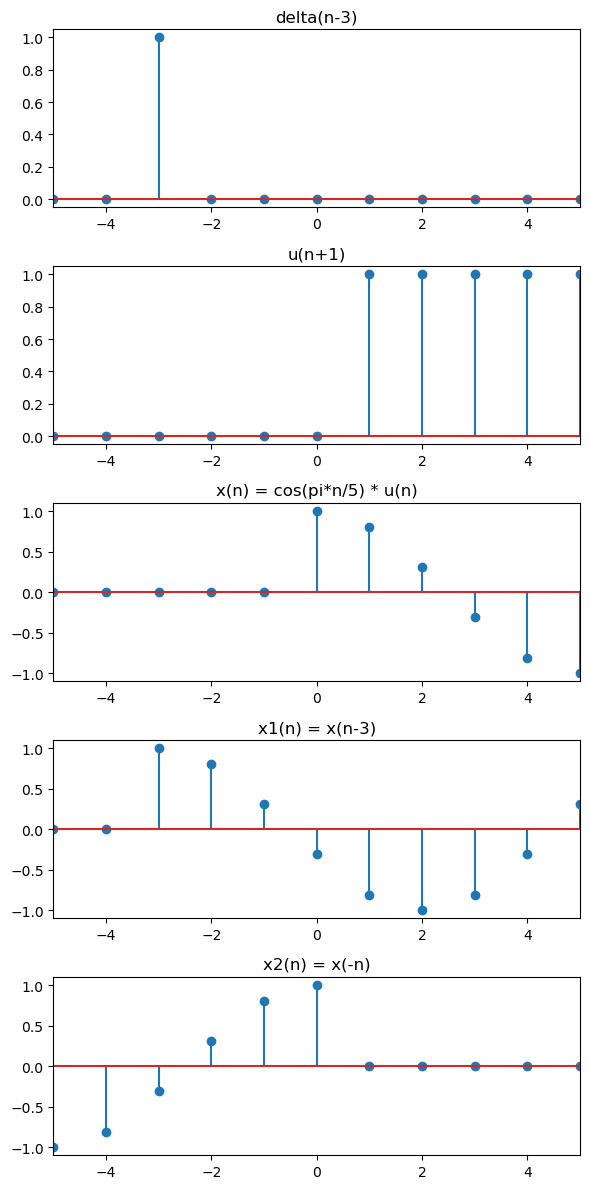

In [2]:
plt.figure(figsize=(6, 12))  # Increase the height (e.g., 12)

# I. delta(n - 3)
plt.subplot(5, 1, 1)
plt.stem(n-3, delta)
plt.title("delta(n-3)")
plt.xlim(-5, 5)


# II. u(n + 1)
plt.subplot(5, 1, 2)
plt.stem(n+1, u(n))
plt.title("u(n+1)")
plt.xlim(-5, 5)

# III. x(n) = cos(pi*n/5) * u(n)
x = np.cos(np.pi * n / 5) * u(n)
plt.subplot(5, 1, 3)
plt.stem(n, x)
plt.title("x(n) = cos(pi*n/5) * u(n)")
plt.xlim(-5, 5)

# IV. x1(n) = x(n-3)
plt.subplot(5, 1, 4)
plt.stem(n-3, x)
plt.title("x1(n) = x(n-3)")
plt.xlim(-5, 5)

# V. x2(n) = x(-n)
plt.subplot(5, 1, 5)
plt.stem(-n, x)
plt.title("x2(n) = x(-n)")
plt.xlim(-5, 5)

plt.tight_layout()
plt.show()


for x1, a time shift to the left by 3 was performed
for x2, a time reversal was performed

# A2. Signal Transformation Part 2

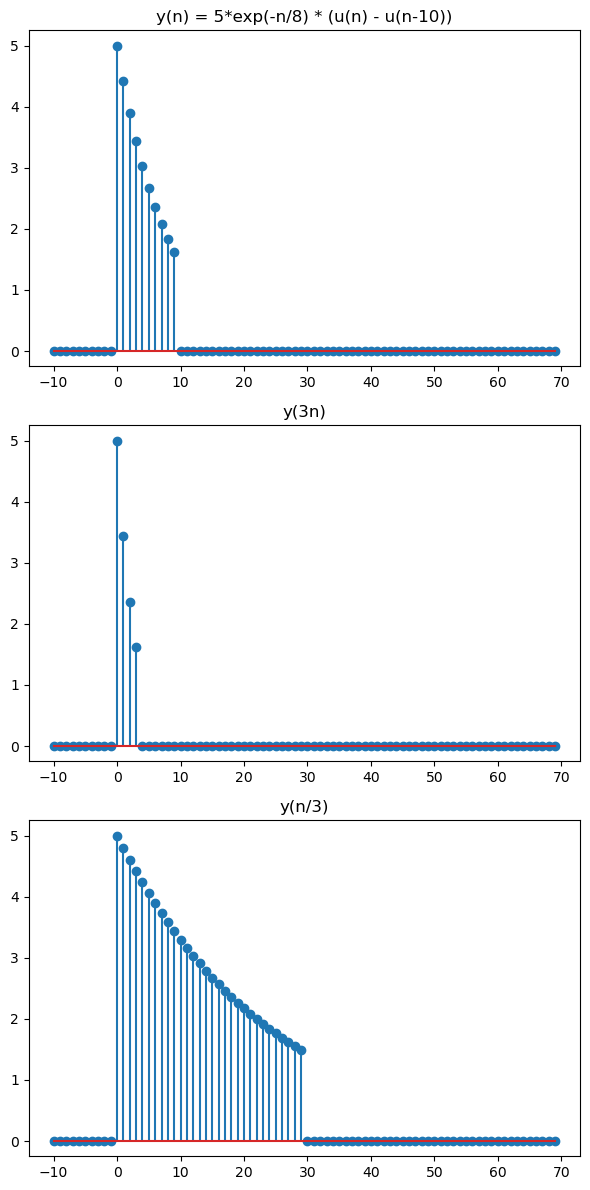

In [3]:
n = np.arange(-10, 70)
u = lambda n: 1.0 * (n >= 0)

y = lambda n: 5*np.exp(-n / 8) * (u(n) - u(n-10))

fig, axes = plt.subplots(3, 1, figsize=(6, 12))

axes[0].stem(n, y(n))
axes[0].set_title("y(n) = 5*exp(-n/8) * (u(n) - u(n-10))")

axes[1].stem(n, y(3*n))
axes[1].set_title("y(3n)")

axes[2].stem(n, y(n/3))
axes[2].set_title("y(n/3)")

plt.tight_layout()
plt.show()


The transformations that are applied to y(n) are downsamppling and upsampling. 

By taking the signal every 3n (y1), we are reducing the amount of samples being taken, resulting in more spread out points and less accurate data.

Similarly, by taking 3 times as much samples (y2), the data is more complete over the interval, and closer to being continuous and replicating the signal better.


# A3. Signal Transformation part 3
ASK TA FOR HELP

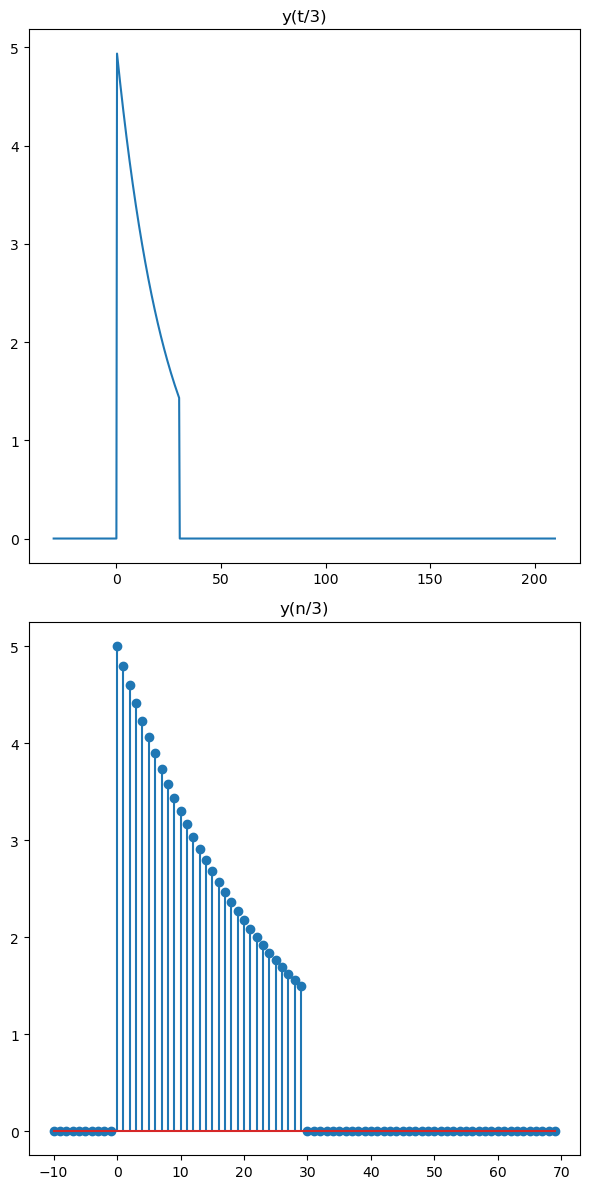

In [4]:
t = np.arange(-10, 70, 0.1)
u = lambda t: 1.0 * (t >= 0)

z = 5*np.exp(-t / 8) * (u(t) - u(t-10))


plt.figure(figsize=(6, 12))

plt.subplot(2, 1, 1)
plt.plot(3*t, z)
plt.title("y(t/3)")

plt.subplot(2, 1, 2)
plt.stem(n, y(n/3))
plt.title("y(n/3)")

plt.tight_layout()
plt.show()

The reason the two look different is because in continuous time, all values are considered, whereas in Discrete time, only integer values are considered. y2(n) takes sample values only at integer values, thus resulting in impulses at each integer value. y3(n) shows the entire signal, including all real numbers in between.

# B. Recursive Solution of Difference Equation

#### 1. A person makes a deposit (the input) in a bank regularly every month from January. The bank pays (𝐈 + 1)% interest on the account balance. Find the equation relating the output 𝑦[𝑛] (the balance) to the input 𝑥[𝑛] (the deposit). Consider the account balance at the beginning of the year is (D+1) x $1000. (See example 3.6 from the textbook for help.)

I = 4 => Interest rate = 5%
D = 1 => Deposit = $2000

r = 0.05
d = 2000

Balance y(n) is equal to previous balance y(n-1) + interest on previous balance r*y(n-1) + deposit amount x(n).

y(n) = y(n-1) + r*y(n-1) + x(n)
y(n) - (1+r)*y(n-1) = x(n)

^^ Delay Form

y(n+1) - (1+r)*y(n) = x(n+1)

^^ Advance Form




#### 2. Find the zero input response (If no deposits are made) and plot it


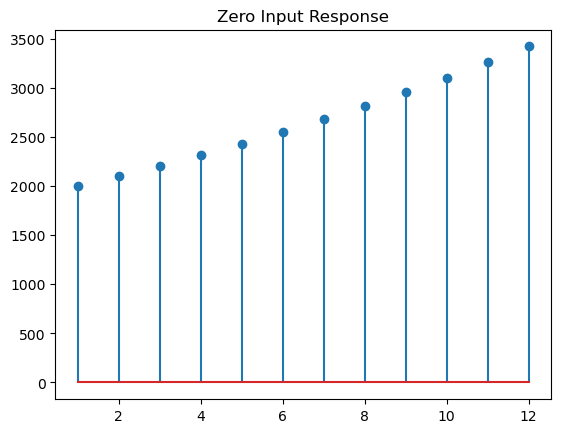

In [5]:
n = np.arange(0, 12)
balance = np.zeros(len(n))

balance[0] = 2000 # Initial Balance
r = 0.05 # Interest Rate

for i in range(0, len(n)-1):
    balance[i+1] = (1 + r)*balance[i] + 0 # Deposit = 0
    

plt.figure()    
plt.stem(n+1, balance)
plt.title("Zero Input Response")
plt.show()


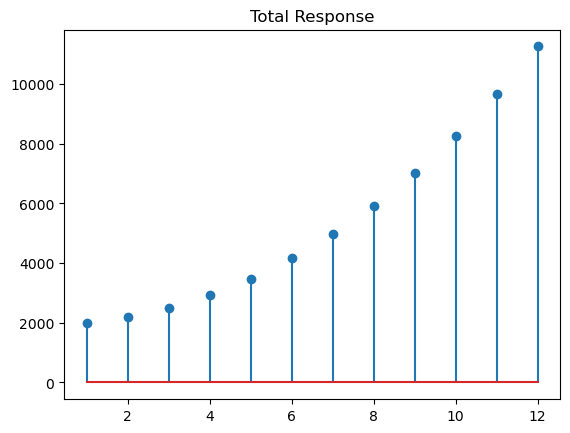

In [6]:
#### If person deposits 100n dollars each month (n is month number), what is the total response? Use python to plot it.

n = np.arange(0, 12)
balance = np.zeros(len(n))

balance[0] = 2000 # Initial Balance
r = 0.05 # Interest Rate

for i in range(0, len(n)-1):
    balance[i+1] = (1 + r)*balance[i] + 100*(i+1) # Deposit = 100*n
    
plt.figure()
plt.stem(n+1, balance)
plt.title("Total Response")
plt.show()

# C. Design a filter: N-point maximum filter


#### 1. Python function that performs max filtering on an input vector x with length M


In [7]:
def maxFiltering(x, N):
    M = len(x)
    # Initialize output to be same size as input
    y = np.zeros(M)
    
    # Ignore first 4 elements since they are less than N
    # they are already set to 0
    for n in range(N, M):
        # Find the max value of the last N elements
        y[n] = np.amax(x[(n - (N - 1)) : n + 1])
        
    return y

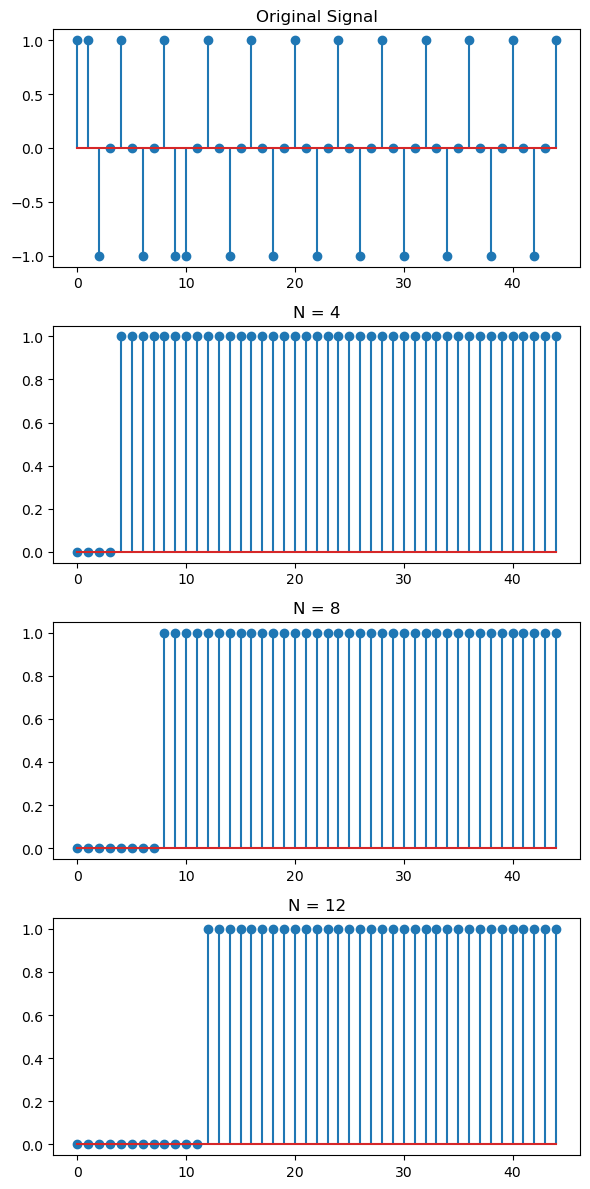

In [8]:
dfunc = lambda n: 1.0 * (n == 0)
n = np.arange(0, 45)

x = np.cos(np.pi * n / 2) - dfunc(n - 9) + dfunc(n - 1)

N_values = [4, 8, 12]
outputs = [maxFiltering(x, N) for N in N_values]

plt.figure(figsize=(6, 12))

plt.subplot(4, 1, 1)
plt.stem(n, x)
plt.title("Original Signal")

plt.subplot(4, 1, 2)
plt.stem(n, outputs[0])
plt.title("N = 4")

plt.subplot(4, 1, 3)
plt.stem(n, outputs[1])
plt.title("N = 8")

plt.subplot(4, 1, 4)
plt.stem(n, outputs[2])
plt.title("N = 12")

plt.tight_layout()
plt.show()


Given that the function is periodic with a period less than or equal to 4, for all situations, the last N values have 1 as the greatest number. Since they sample the last N values, the first N terms are all 0. If the function were to be longer, the maximum value for each term may be different at other points, resulting in different values for different N.

# D. Energy and Power of a Discrete Signal

#### 1) Write a Python function that receives a finite length vector x[n] and returns the energy and power of the vector.

In [9]:
#### Energy is equal to the summation of all absolute values of each point squared.
def energy(x):
    energy = np.sum(np.abs(x)**2)
    return energy

#### Power is equal to the summation of all absolute values of each point squared divided by the length of the signal.
def power(x):
    power = np.sum(np.abs(x)**2) / len(x)
    return power



#### 2) Calculate the energy and power of the signal x[n] illustrated below (Fig.P3.1-1 (c) of the textbook)

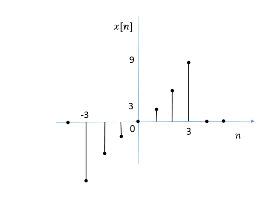

In [10]:
n = np.arange(-3, 5)
x = np.array([-9, -6, -3, 0, 3, 6, 9])

print(f"Energy: {energy(x)}")
print(f"Power: {power(x)}")

Energy: 252
Power: 36.0
